# effect of the locality on the price

In [1]:
import os
import warnings
import pandas as pd

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
col_names =  ["Locality",     
              "Type_of_property",
              "Subtype_of_property",
              "Price",
              "Type_of_sale",
              "Number_of_rooms",
              "Living_Area",
              "Fully_equipped_kitchen",
              "Furnished",
              "Open_fire",
              "Terrace",
              "Terrace_Area",
              "Garden",
              "Garden_Area",
              "Surface_area_of_the_plot_of_land",
              "Number_of_facades",
              "Swimming_pool",
              "State_of_the_building"
              ]

#file_path = r".\main_csv.csv"
file_path = r"C:\Users\Sacha\Documents\BeCode\real-estate-price-prediction\data_analysis\main_csv.csv" 
df_final = pd.read_csv(file_path)

The block under will give us the number of unique zip code we have in our data (918 in our case)

In [4]:
print( len(df_final["Locality"].unique()) )

918


Now we will look at the distribution of those zip code

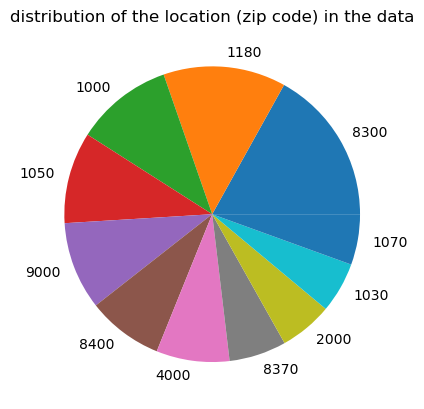

In [5]:
freq_loc = df_final["Locality"].value_counts()

threshold = freq_loc.sum() * 0.01
freq_loc = freq_loc[freq_loc >= threshold]

plt.pie(freq_loc, labels=freq_loc.index)
plt.title("distribution of the location (zip code) in the data")
plt.show()

In [6]:
print("number of zip code 8300 in our data:")
print(sum(df_final["Locality"] == 8300))

number of zip code 8300 in our data:
514


This pie plot gives us the proportion of the most represented zip code. We can see that the difference of representation is huge.

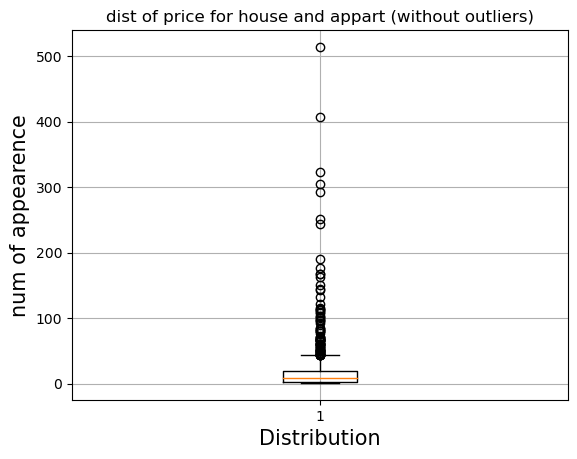

In [31]:
plt.boxplot(df_final["Locality"].value_counts())#,showfliers=False)
plt.xlabel('Distribution', fontsize=15)
plt.ylabel("num of appearence", fontsize=15)
plt.title("dist of price for house and appart (without outliers)")
plt.grid(True)

plt.show()

Let's now have a look on the impact of the location on the Price

In [61]:
prices_groupby_loc = df_final.groupby("Locality")["Price"]
median_prices = prices_groupby_loc.median().sort_values()
mean_prices = prices_groupby_loc.mean().sort_values()
print("median", median_prices)
print("------------------------")
print("mean", mean_prices)

median Locality
6182      59000.0
5680      59900.0
6534      60000.0
5542      65000.0
6594      69000.0
          ...    
1602    1300000.0
4861    1525000.0
9830    1895000.0
3806    2450000.0
7740    2650000.0
Name: Price, Length: 918, dtype: float64
------------------------
mean Locality
6182    5.900000e+04
5680    5.990000e+04
6534    6.000000e+04
5542    6.500000e+04
6594    6.900000e+04
            ...     
4861    1.525000e+06
3080    1.822359e+06
9830    1.895000e+06
3806    2.450000e+06
7740    2.650000e+06
Name: Price, Length: 918, dtype: float64


No plot is needed here, we clearly see tath there is a huge gap between the median of the different locality